# EDA process for cyberbully detection dataset.



Due to the fact we found a more complete and comprehensive dataset, we want to try to combine it with the original one. In this way we will be able to have more complex data for our fine-tunning process. To do so, we just need to check for duplicates and optain information about the balance and weights of the classes. We also need to if ModernBert tokenizer has any way to process emojis. If not, we will have to erase them. It is also another nice opportunity to practice polars dataframe capabilites.

In [1]:
import polars as pl


In [2]:
df_0, df_1 = pl.read_csv("/home/usuario/PycharmProjects/cyberbullying-detection/data_source/cb_multi_labeled_balanced.csv"), pl.read_csv("/home/usuario/PycharmProjects/cyberbullying-detection/data_source/cyberbullying_tweets.csv")

In [3]:
df_0

text,label
str,str
"""@ZubearSays Any real nigga isn…","""ethnicity/race"""
"""@MoradoSkittle @prolifejewess …","""not_cyberbullying"""
"""the only thing i wish, i wish …","""ethnicity/race"""
"""You saudias are not friends of…","""religion"""
"""@JaydenT2399 @TractorLaw @holm…","""religion"""
…,…
"""Thank fuck they didn’t dance r…","""not_cyberbullying"""
"""Sierra Canyon vs. Alemany - Ca…","""not_cyberbullying"""
"""@queenbellaxoxo @PontiacMadeDD…","""gender/sexual"""


In [4]:
df_0.null_count()

text,label
u32,u32
0,0


In [ ]:
df_0.to

In [5]:
df_0["label"].value_counts()

label,count
str,u32
"""religion""",15990
"""not_cyberbullying""",50000
"""ethnicity/race""",17000
"""gender/sexual""",17000


In [20]:
x, y = df_0["label"].value_counts()["label"].to_list(), df_0["label"].value_counts()["count"].to_list()

In [29]:
df_0.shape[0]

99990

In [31]:
df_0_percentage = {k : (v * 100) / df_0.shape[0] for k, v in dict(zip(x,y)).items()}

In [32]:
df_0_percentage

{'gender/sexual': 17.001700170017003,
 'ethnicity/race': 15.991599159915992,
 'religion': 17.001700170017003,
 'not_cyberbullying': 50.00500050005}

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_pie_chart(data_dict):
    # Set a nice Seaborn style for the plot
    sns.set(style="whitegrid")
    
    # Prepare the labels and values for the pie chart
    labels = list(data_dict.keys())
    values = list(data_dict.values())

    # Plotting the pie chart
    plt.figure(figsize=(7, 7))
    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3", len(data_dict)))
    
    # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.axis('equal')
    
    # Add title
    plt.title('Pie Chart of Percentages')

    # Show the plot
    plt.show()

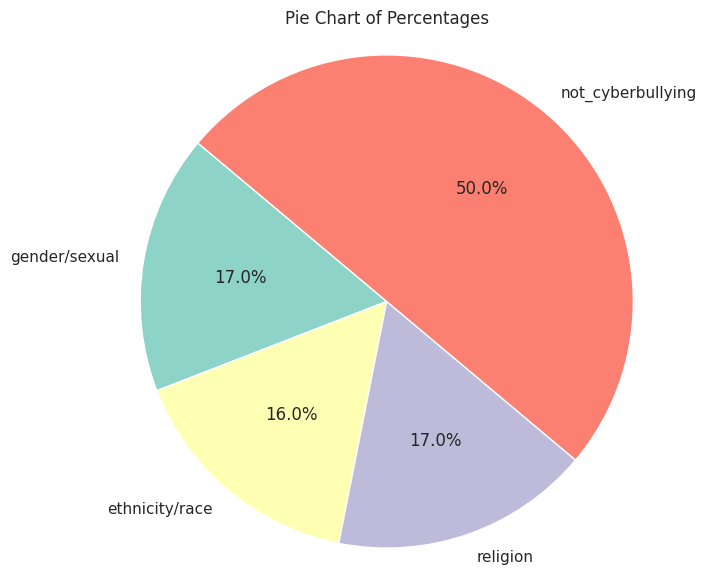

In [34]:
plot_pie_chart(df_0_percentage)

In [35]:
df_1

tweet_text,cyberbullying_type
str,str
"""In other words #katandandre, y…","""not_cyberbullying"""
"""Why is #aussietv so white? #MK…","""not_cyberbullying"""
"""@XochitlSuckkks a classy whore…","""not_cyberbullying"""
"""@Jason_Gio meh. :P thanks for…","""not_cyberbullying"""
"""@RudhoeEnglish This is an ISIS…","""not_cyberbullying"""
…,…
"""Black ppl aren't expected to d…","""ethnicity"""
"""Turner did not withhold his di…","""ethnicity"""
"""I swear to God. This dumb nigg…","""ethnicity"""


In [37]:
w, z = df_1["cyberbullying_type"].value_counts()["cyberbullying_type"].to_list(), df_1["cyberbullying_type"].value_counts()["count"].to_list()

In [38]:
df_1_percetnage = {k: (v *100) / df_1.shape[0] for k, v in dict(zip(w,z)).items()}

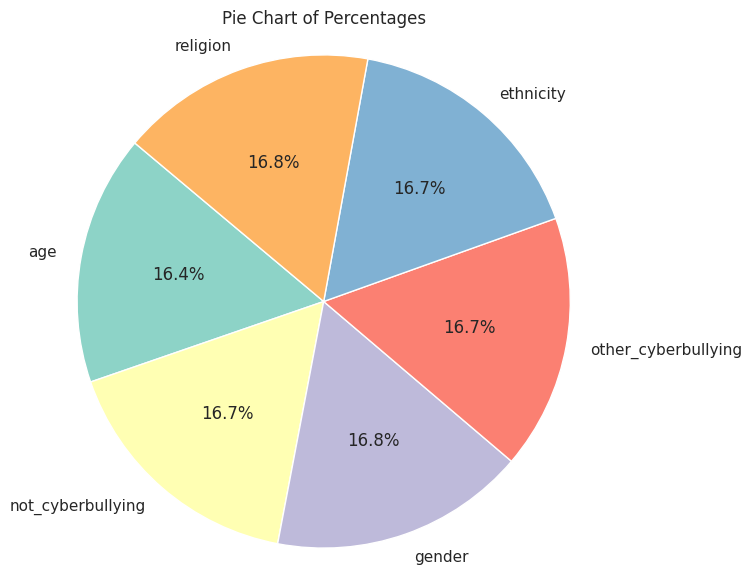

In [39]:
plot_pie_chart(df_1_percetnage)